# Correlation coefficient from fMRI regression residuals

Given a set of regression residuals, it is possible to calculate correlation coefficients and the acquired time series signal values.

In this example I explain how to get such coefficients from fMRI GLM residuals generated with FSL software.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nilearn import image
from nilearn.image.image import mean_img, new_img_like
from nilearn.plotting import plot_carpet, plot_epi, plot_stat_map, view_img

In [2]:
# Residuals are stored in a file
residuals_img = image.load_img('data/res4d.nii.gz')
residuals = residuals_img.get_data()
residuals.shape

<ipython-input-2-d58dc9ec4a11>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  residuals = residuals_img.get_data()


(64, 64, 35, 17)

Mask is needed to visualize the data.

<ipython-input-3-dac95f5db77f>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask = mask_img.get_data().astype(bool)
/usr/local/lib/python3.9/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Within the mask there are 58219/143360 non-zero voxels.
    i.e.,  40.61%


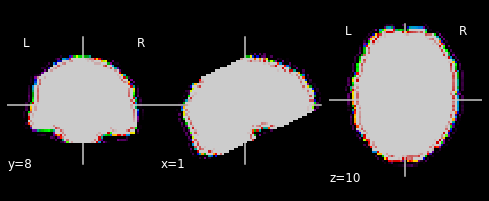

In [3]:
mask_img = image.load_img('data/mask.nii.gz')
mask = mask_img.get_data().astype(bool)

print('Within the mask there are %s/%s non-zero voxels.' % (mask.sum(), mask.size))
print('    i.e.,  %.2f%%' % (mask.sum()/mask.size*100))

# Visualize the mask
plot_epi(new_img_like(mask_img, mask))

<ipython-input-4-f4ae4c9c015d>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


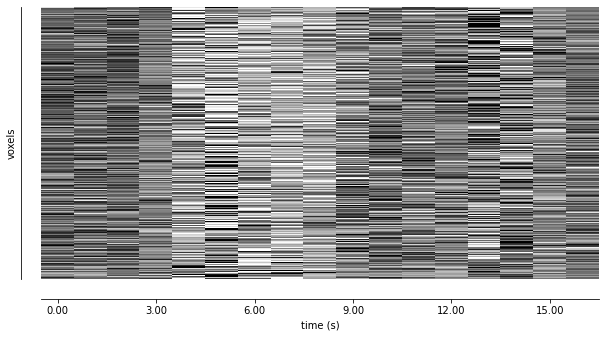

In [4]:
display = plot_carpet(residuals_img, mask_img)
display.show()

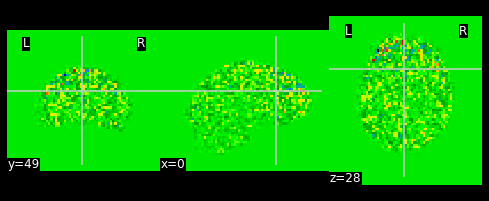

In [5]:
plot_epi(mean_img(residuals_img))

In [6]:
# Real signal values, for validating the procedure
y_true_img = image.load_img('data/filtered_func_data.nii.gz')
y_true = y_true_img.get_data()
y_true.shape

<ipython-input-6-63c4f45cecd3>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  y_true = y_true_img.get_data()


(64, 64, 35, 145)

<ipython-input-7-e22210ed3f5f>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


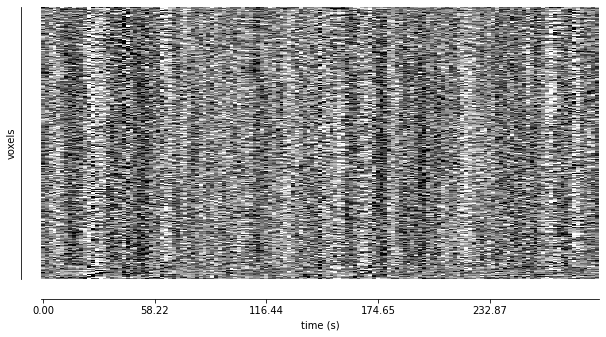

In [7]:
display = plot_carpet(y_true_img, mask_img)
display.show()

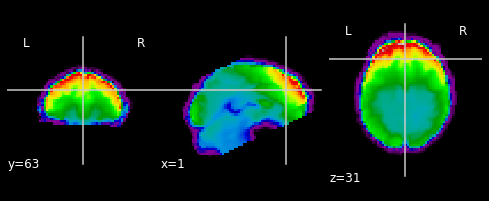

In [8]:
plot_epi(mean_img(y_true_img))

In [9]:
# Calculate sum of squares of the residuals
u = (residuals**2).sum(axis=3)
u.shape

(64, 64, 35)

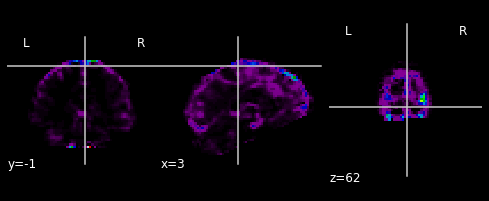

In [10]:
plot_epi(new_img_like(mask_img, u))

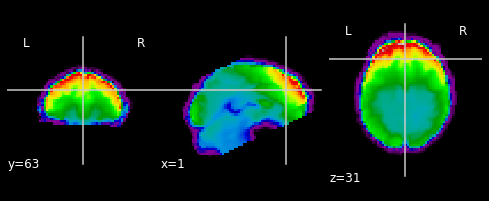

In [11]:
y_mean = y_true.mean(axis=3)
plot_epi(new_img_like(mask_img, y_mean))

In [12]:
mean_matrix = np.zeros(y_true.shape)
mean_matrix.shape

(64, 64, 35, 145)

(64, 64, 35)


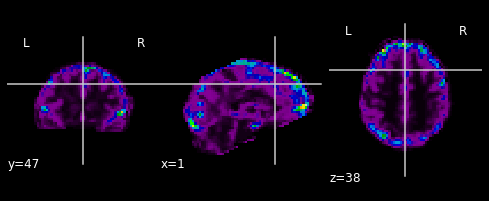

In [13]:
# I haven't found the proper way to broadcast y_true to mean_matrix
for i in range(64):
    for j in range(64):
        for k in range(35):
            mean_matrix[i, j, k, :] = y_mean[i, j, k]

# and finally we have v -- the squared difference between
# acquired signals and mean signal
v = ((y_true - mean_matrix)**2).sum(axis=3)
print(v.shape)

# Visualize the v
plot_epi(new_img_like(mask_img, v))

In [14]:
R_squared = 1 - (u[mask]/v[mask])
R_squared.shape

(58219,)

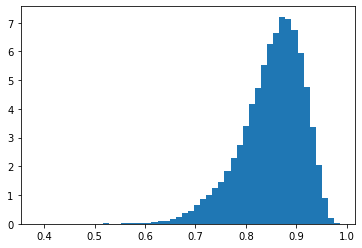

In [15]:
plt.hist(R_squared, 50, density=True)
plt.show()

In [16]:
R_squared_img_shape = np.zeros(mask.shape)
R_squared_img_shape.shape

(64, 64, 35)

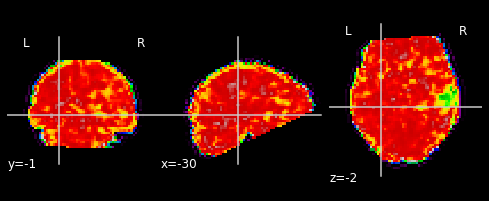

In [17]:
R_squared_img_shape[mask] = R_squared

# Visualize the R squared coefficient
plot_epi(new_img_like(mask_img, R_squared_img_shape))

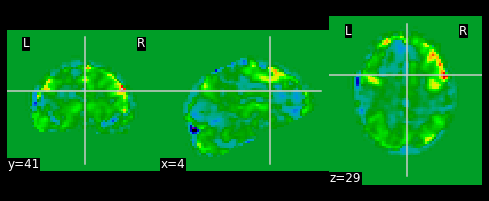

In [18]:
plot_epi(image.load_img('data/pe1.nii.gz'))